<h1 style="text-align: center"> Cheroid Backtester </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from LoadData import Loader

In [2]:
# import sys
# !python -m pip install --user --index-url=https://bloomberg.bintray.com/pip/simple blpapi
# import blpapi

# Load Data

1. load from csv
2. load from excel
3. load from bbg API (can be slow and resource consuming)

In [157]:
dataframe = Loader.load_data("SampleData.xlsx")


In [158]:
dataframe.columns.values[0] = "Date"
dataframe.set_index("Date", inplace=True)

In [159]:
dataframe.head()

,BABA.US,PDD.US,BILI.US,TSLA.US,EDU.US
Date,,,,,
2019-01-02,136.699997,22.209999,14.28,310.119995,55.310001
2019-01-03,130.600006,21.520000,12.95,300.359985,53.950001
2019-01-04,139.750000,22.690001,13.70,317.690002,56.570000
2019-01-07,143.100006,23.209999,14.27,334.959991,58.619999
2019-01-08,146.789993,24.000000,14.78,335.350006,58.740002


# Model

In [160]:
MODEL_NAME = "??? Structure Product"
# TENURE = "12M"
# KO_BAR = 1.0
# PUT_STRIKE = 0.7

PAY_FREQ = "Q"
COUPON_RATE = 0.04

FREQ_NUM_MAP = {"Q": 0.25}

In [161]:
# dataframe = dataframe.head(1).append(dataframe.resample(OBS_FREQ).last()) # sample data to desired frequency
# dataframe["Underlying"] = dataframe.apply(lambda x: min(x), axis=1) # worst of n stocks
# df_benchmark = dataframe.loc[dataframe.index<"2019-02-01"].apply(lambda x: min(x), axis=0) # benchmark
df_benchmark = dataframe.iloc[0]
dataframe = dataframe / df_benchmark # normalize price to net worth
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(lambda x: int(x > 0.8))

In [162]:
df = dataframe.resample(PAY_FREQ).sum() / dataframe.resample(PAY_FREQ).count()

df = df.apply(lambda x: x * COUPON_RATE * FREQ_NUM_MAP[PAY_FREQ]) # realized coupon payment

# Result

In [163]:
df.cumsum()

,BABA.US,PDD.US,BILI.US,TSLA.US,EDU.US
Date,,,,,
2019-03-31,0.01,0.01,0.01,0.010000,0.01
2019-06-30,0.02,0.02,0.02,0.013016,0.02
2019-09-30,0.03,0.03,0.03,0.014266,0.03
2019-12-31,0.04,0.04,0.04,0.022860,0.04
2020-03-31,0.05,0.05,0.05,0.032860,0.05
2020-06-30,0.06,0.06,0.06,0.042860,0.06


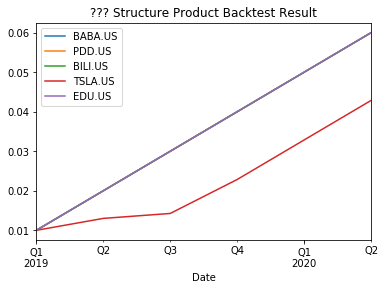

In [164]:
df.cumsum().plot(title=f"{MODEL_NAME} Backtest Result")
plt.show()